# Imports

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import time
from tqdm import trange
%matplotlib inline

import sys
sys.path.append('C:\\Users\\lucai\\nuvPriors_repo\\nuvPriors')
from src.models.pwcModel import PWCModel

# 1-Dimensional Case

## Data Generation

Text(0.5, 0.98, 'Generated Observations')

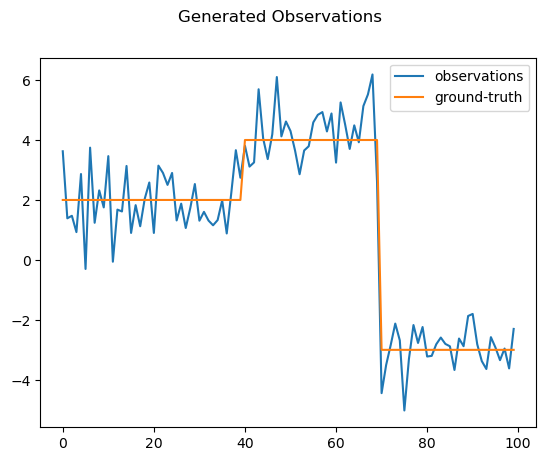

In [2]:
# Specify parameters
N = 100
D = 1
varNoise = 1.0
seed = 1
np.random.seed(seed)

# Specify levels and array with level indices
levels = np.array([[2.0], [4.0], [-3.0]])
selectedLevels = np.concatenate(
    (np.zeros(int(0.4*N), dtype=int), 
     np.ones(int(0.3*N), dtype=int), 
     np.ones(int(0.3*N), dtype=int)*2), 
    axis=0)
    
# Calculate X and Y
x = np.array([levels[selectedLevel_i] for selectedLevel_i in selectedLevels])
y = np.random.normal(x,np.sqrt(varNoise))

# Plot data
fig1, axs1 = plt.subplots()
axs1.plot(y, label='observations')
axs1.plot(x, label='ground-truth')
axs1.legend()
fig1.suptitle('Generated Observations')

## Estimation by MBF 
MBF works with the mean and covariance matrix representations. Therefore, the inputs must be given in this representation. Furthermore, the estimator must be initialized with mode='conventional'!

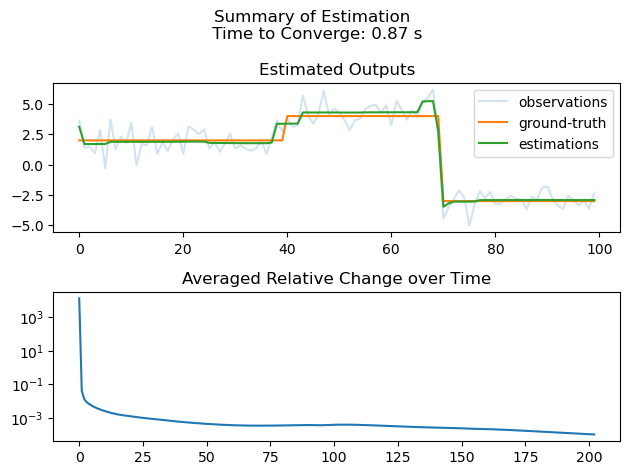

In [3]:
# Calculate ingoing messages 
sigma = np.identity(D, dtype=float)*varNoise   # known observation noise covariance matrices
mk_b = y
Vk_b = np.tile(sigma, (N,1,1))

########################################################################################################################

# Initialize estimator (mode='conventional')
estimator = PWCModel(N=N, D=D, mode='conventional')

# Do estimation
start_time = time.time()
changes, i_it = estimator.estimate_output(mxik_b=mk_b, VWk_b=Vk_b)
stop_time = time.time()
conv_time = stop_time - start_time

########################################################################################################################

# Plot estimations
fig2, axs2 = plt.subplots(2,1)

axs2[0].plot(y, alpha=0.2, label='observations')
axs2[0].plot(x, label='ground-truth')
axs2[0].plot(estimator.mk_hat, label='estimations')
axs2[0].set_title('Estimated Outputs')
axs2[0].legend()

axs2[1].plot(changes[:i_it+1])
axs2[1].set_yscale('log')
axs2[1].set_title('Averaged Relative Change over Time')

fig2.suptitle(f'Summary of Estimation \n Time to Converge: {round(conv_time, 2)} s')
fig2.tight_layout()

## Estimation by BIFM 
BIFM works with the dual-mean and precision matrix representations. Therefore, the inputs must be adapted compared to the previous cell. Furthermore, the estimator must be initialized with mode='dual'!

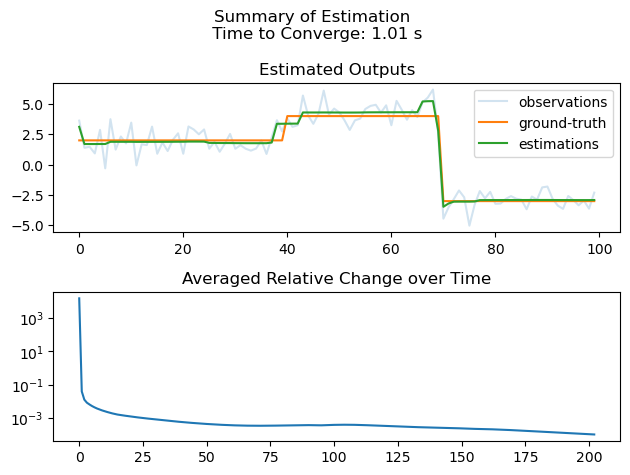

In [4]:
# Calculate ingoing messages 
sigma = np.identity(D, dtype=float)/varNoise   # known observation noise precision matrices
Wk_b = np.tile(sigma, (N,1,1))
xik_b = np.reshape(Wk_b @ y[:,:,np.newaxis], (N,D))

########################################################################################################################

# Initialize estimator (mode='conventional')
estimator = PWCModel(N=N, D=D, mode='dual')

# Do estimation
start_time = time.time()
changes, i_it = estimator.estimate_output(mxik_b=xik_b, VWk_b=Wk_b)
stop_time = time.time()
conv_time = stop_time - start_time

########################################################################################################################

# Plot estimations
fig3, axs3 = plt.subplots(2,1)

axs3[0].plot(y, alpha=0.2, label='observations')
axs3[0].plot(x, label='ground-truth')
axs3[0].plot(estimator.mk_hat, label='estimations')
axs3[0].set_title('Estimated Outputs')
axs3[0].legend()

axs3[1].plot(changes[:i_it+1])
axs3[1].set_yscale('log')
axs3[1].set_title('Averaged Relative Change over Time')

fig3.suptitle(f'Summary of Estimation \n Time to Converge: {round(conv_time, 2)} s')
fig3.tight_layout()

# 3-Dimensional Case

## Data Generation

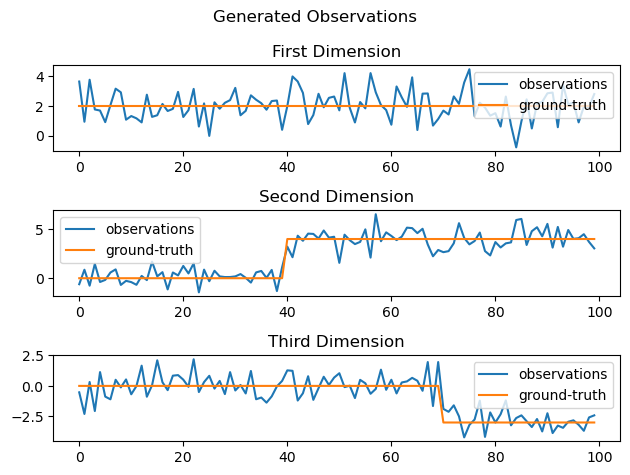

In [5]:
# Specify parameters
N = 100
D = 3
varNoise = 1.0
seed = 1
np.random.seed(seed)

# Specify levels and array with level indices
levels = np.array([[2.0, 0.0, 0.0], [2.0, 4.0, 0.0], [2.0, 4.0, -3.0]])
selectedLevels = np.concatenate(
    (np.zeros(int(0.4*N), dtype=int), 
     np.ones(int(0.3*N), dtype=int), 
     np.ones(int(0.3*N), dtype=int)*2), 
    axis=0)
    
# Calculate X and Y
x = np.array([levels[selectedLevel_i] for selectedLevel_i in selectedLevels])
y = np.random.normal(x,np.sqrt(varNoise))

# Plot data
fig4, axs4 = plt.subplots(3,1)

axs4[0].plot(y[:,0], label='observations')
axs4[0].plot(x[:,0], label='ground-truth')
axs4[0].legend()
axs4[0].set_title('First Dimension')

axs4[1].plot(y[:,1], label='observations')
axs4[1].plot(x[:,1], label='ground-truth')
axs4[1].legend()
axs4[1].set_title('Second Dimension')

axs4[2].plot(y[:,2], label='observations')
axs4[2].plot(x[:,2], label='ground-truth')
axs4[2].legend()
axs4[2].set_title('Third Dimension')

fig4.suptitle('Generated Observations')
fig4.tight_layout()

## Estimation by MBF

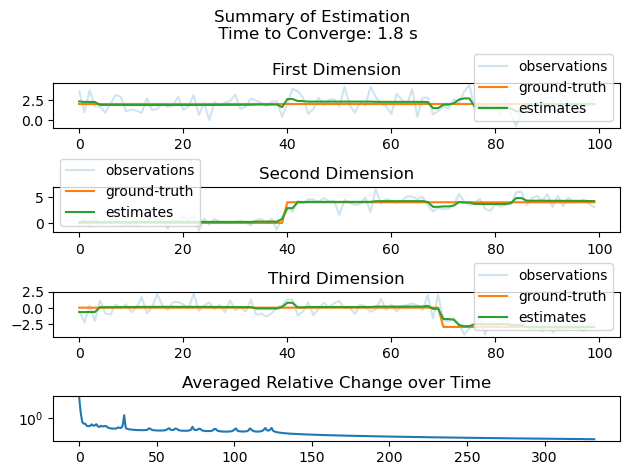

In [6]:
# Calculate ingoing messages 
sigma = np.identity(D, dtype=float)*varNoise   # known observation noise covariance matrices
mk_b = y
Vk_b = np.tile(sigma, (N,1,1))

########################################################################################################################

# Initialize estimator (mode='conventional')
estimator = PWCModel(N=N, D=D, mode='conventional')

# Do estimation
start_time = time.time()
changes, i_it = estimator.estimate_output(mxik_b=mk_b, VWk_b=Vk_b)
stop_time = time.time()
conv_time = stop_time - start_time

########################################################################################################################

fig5, axs5 = plt.subplots(4,1)

axs5[0].plot(y[:,0], alpha=0.2, label='observations')
axs5[0].plot(x[:,0], label='ground-truth')
axs5[0].plot(estimator.mk_hat[:,0], label='estimates')
axs5[0].legend()
axs5[0].set_title('First Dimension')

axs5[1].plot(y[:,1], alpha=0.2, label='observations')
axs5[1].plot(x[:,1], label='ground-truth')
axs5[1].plot(estimator.mk_hat[:,1], label='estimates')
axs5[1].legend()
axs5[1].set_title('Second Dimension')

axs5[2].plot(y[:,2], alpha=0.2, label='observations')
axs5[2].plot(x[:,2], label='ground-truth')
axs5[2].plot(estimator.mk_hat[:,2], label='estimates')
axs5[2].legend()
axs5[2].set_title('Third Dimension')

axs5[3].plot(changes[:i_it+1])
axs5[3].set_yscale('log')
axs5[3].set_title('Averaged Relative Change over Time')

fig5.suptitle(f'Summary of Estimation \n Time to Converge: {round(conv_time, 2)} s')
fig5.tight_layout()